In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from scipy import stats

# Data Loading and Initial Exploration

## In this section, we load the dataset and perform an initial exploration.
## This includes checking the shape, data types, missing values, and a general summary of the dataset.


In [3]:
# Set the style properly
plt.style.use('default')
sns.set_theme()
sns.set_context("notebook")

In [4]:
df = pd.read_csv("./data/GlobalTemperatures.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                    

# Data Preprocessing
### We convert the 'dt' column to datetime format for proper time-based analysis.
### Additionally, we extract the 'year' and 'month' from the datetime column to facilitate temporal analysis.


In [6]:
df['dt'] = pd.to_datetime(df['dt'])

# Extract year and month for temporal analysis
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month

# Missing Value Analysis
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

#### Visualize missing values

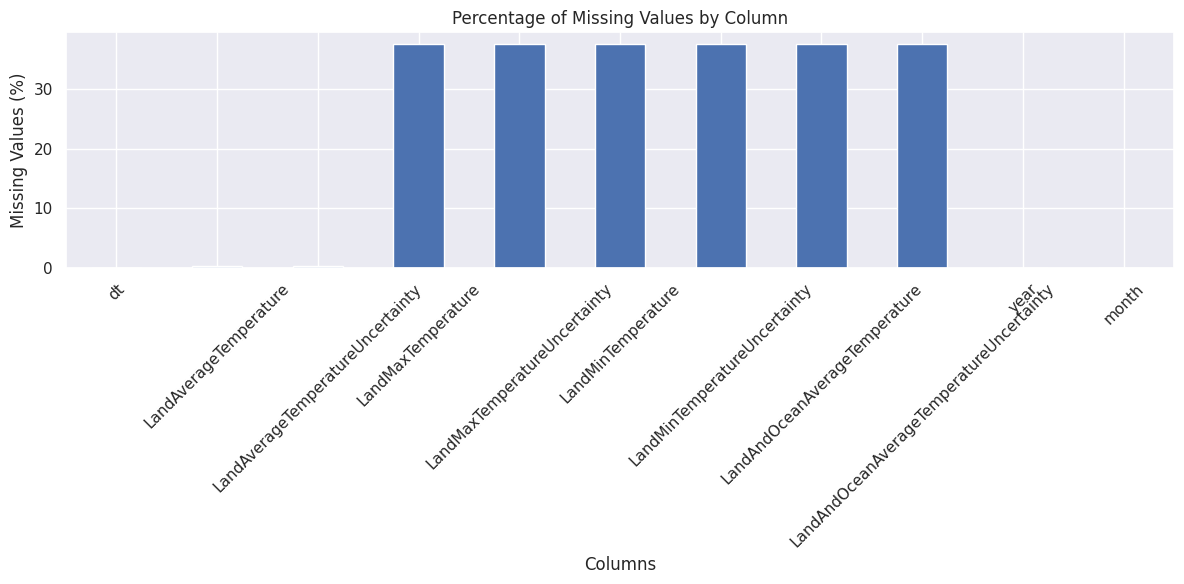


Missing Values Analysis:
dt: 0.00% missing
LandAverageTemperature: 0.38% missing
LandAverageTemperatureUncertainty: 0.38% missing
LandMaxTemperature: 37.59% missing
LandMaxTemperatureUncertainty: 37.59% missing
LandMinTemperature: 37.59% missing
LandMinTemperatureUncertainty: 37.59% missing
LandAndOceanAverageTemperature: 37.59% missing
LandAndOceanAverageTemperatureUncertainty: 37.59% missing
year: 0.00% missing
month: 0.00% missing


In [ ]:
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nMissing Values Analysis:")
for col in df.columns:
    print(f"{col}: {missing_percentages[col]:.2f}% missing")

# 4. Temporal Analysis
# Calculate yearly averages
yearly_avg = df.groupby('year')['LandAverageTemperature'].mean()


 **Observation:**  
- The dataset has a **significant proportion (37.59%) of missing values** in **maximum, minimum, and ocean temperature-related columns**.  
- `LandAverageTemperature` has **minor missing values (0.38%)**, which can be handled with interpolation or imputation.  
- **No missing values** in `dt`, `year`, and `month`, ensuring **temporal analysis is unaffected**.

---

# Temporal Analysis
### Here, we analyze temperature trends over the years.
### We calculate the yearly average temperature and visualize the trend with a line plot.
### Additionally, we fit a trend line to estimate the rate of temperature change over time.

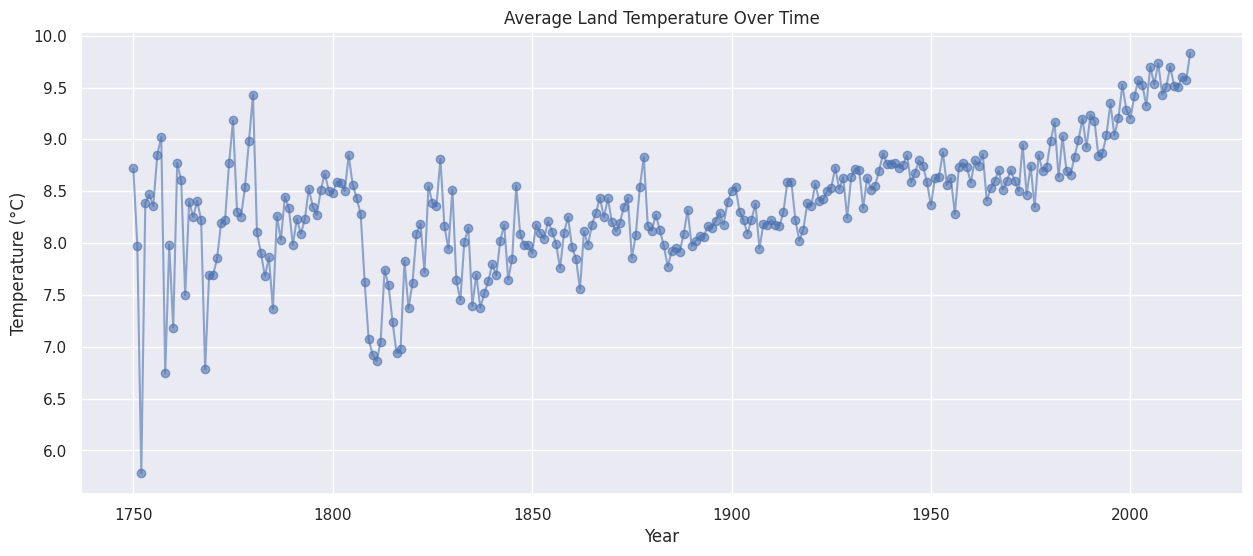

In [8]:

yearly_avg = df.groupby('year')['LandAverageTemperature'].mean()

# Plot temperature trend over years
plt.figure(figsize=(15, 6))
yearly_avg.plot(kind='line', marker='o', alpha=0.6)
plt.title('Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)

### **Inferences**  

- **Long-Term Trend:**  
  - The graph shows a **gradual increase** in average land temperature over the years, indicating a **warming trend**.  
  - While fluctuations exist, the overall pattern suggests **climate change-driven warming**, especially post-1900.  

- **Variability & Fluctuations:**  
  - There are **significant fluctuations** in temperature before the 1900s, with periods of both increase and decrease.  
  - However, **post-1900, temperatures show a more consistent rise**, with fewer drastic drops.  

- **Sharp Increases & Historical Context:**  
  - A **notable increase** in temperature is observed after the mid-20th century, aligning with industrialization and increased greenhouse gas emissions.  
  - The **late 20th and early 21st centuries** show the highest recorded average temperatures.  

 **Overall Insight:**  
The data strongly suggests a long-term warming trend, particularly noticeable post-1900. The increase in temperature correlates with human activities, such as industrialization and increased CO₂ emissions, reinforcing concerns about global climate change.  


---

# Adding a trend line

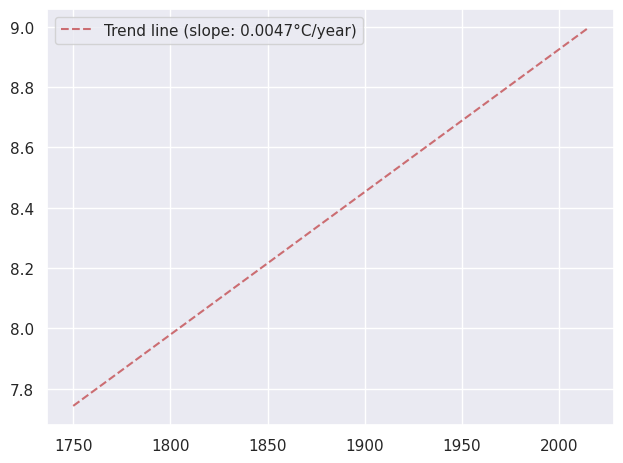

In [9]:
z = np.polyfit(yearly_avg.index, yearly_avg.values, 1)
p = np.poly1d(z)
plt.plot(yearly_avg.index, p(yearly_avg.index), "r--", alpha=0.8, 
         label=f'Trend line (slope: {z[0]:.4f}°C/year)')
plt.legend()
plt.tight_layout()
plt.show()

# Seasonal Analysis
### This section examines seasonal patterns by computing average monthly temperatures.
### A bar chart is used to display the monthly variations in temperature.

### Calculate monthly averages

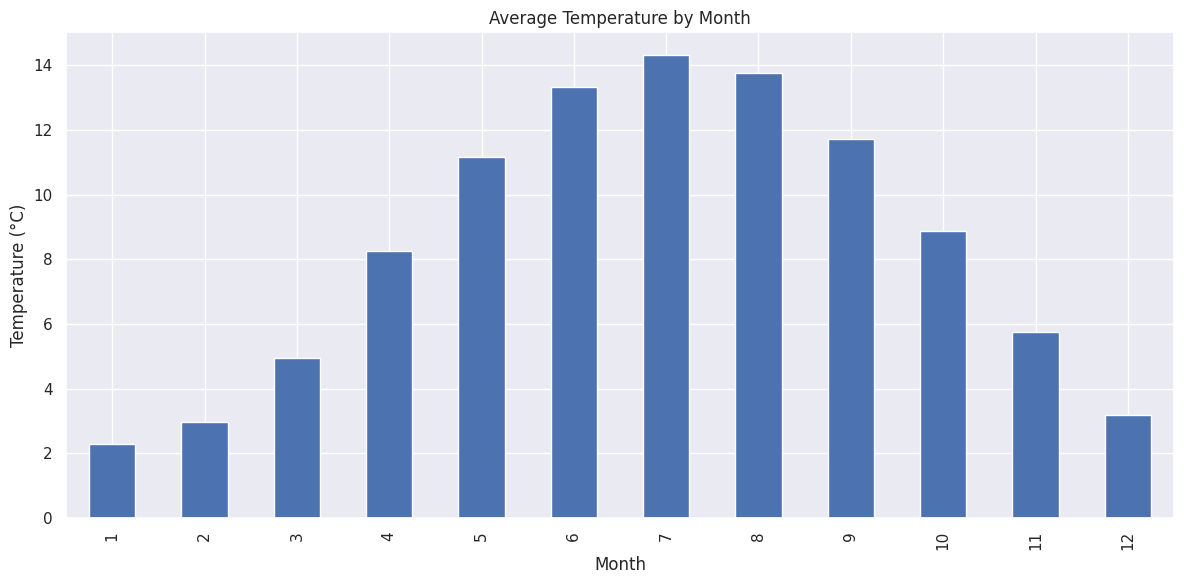

In [10]:
monthly_avg = df.groupby('month')['LandAverageTemperature'].mean()

# Create monthly temperature plot
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

**📌 Inferences**

- **Seasonal Patterns:**  
  - The temperature range fluctuates throughout the year, with a noticeable increase in the middle months (spring/summer) and a decline in the winter months.  
  - The lowest median temperature range is observed in **January (1st month) and December (12th month)**, while the highest occurs around **March to June**.

- **Variability & Outliers:**  
  - The interquartile range (IQR) remains relatively stable across months, but **April, May, and September** show slightly higher variability.  
  - Outliers are present in almost every month, indicating occasional extreme deviations in temperature range.

- **Gradual Shift:**
  - The months from **January to June** show an increasing trend in temperature range, followed by a gradual decline toward December.  
  - This suggests that **seasonal changes influence temperature fluctuations significantly**.

---

# Temperature Distribution Analysis
### We analyze the distribution of temperature values.
### Histograms are created to visualize the distributions of land average, maximum, and minimum temperatures.

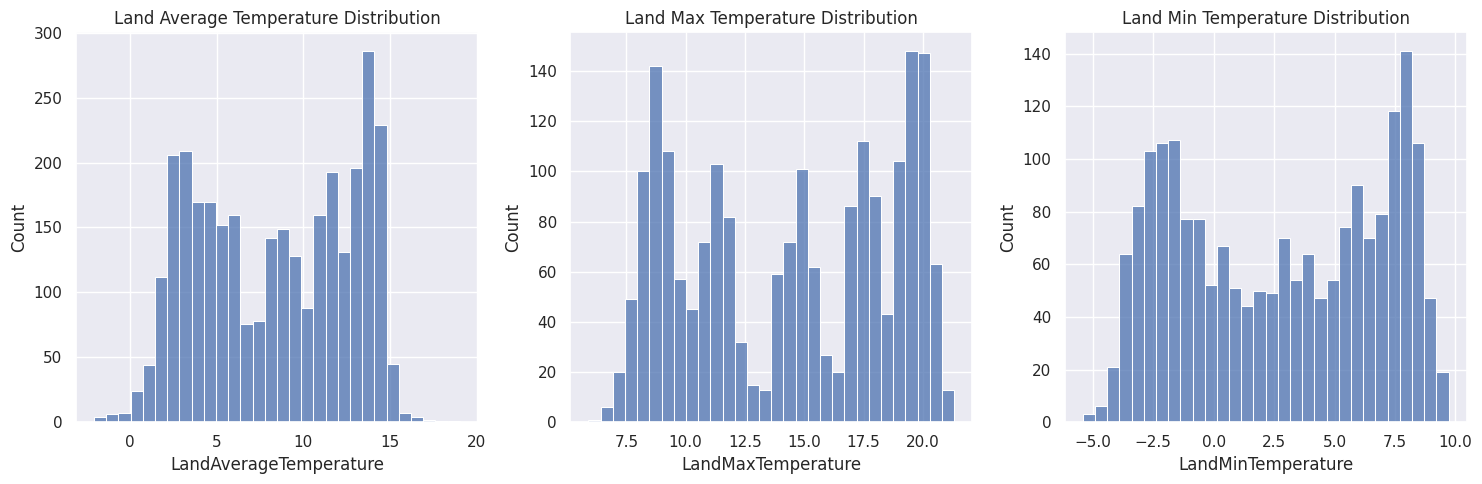

In [11]:
plt.figure(figsize=(15, 5))

# Create distribution plots for different temperature measurements
plt.subplot(131)
sns.histplot(data=df, x='LandAverageTemperature', bins=30)
plt.title('Land Average Temperature Distribution')

plt.subplot(132)
sns.histplot(data=df, x='LandMaxTemperature', bins=30)
plt.title('Land Max Temperature Distribution')

plt.subplot(133)
sns.histplot(data=df, x='LandMinTemperature', bins=30)
plt.title('Land Min Temperature Distribution')

plt.tight_layout()
plt.show()

### **Analysis of Land Temperature Distributions**  

#### **1. Land Average Temperature Distribution**  
- The distribution is **bimodal**, with peaks around **3–5°C and 13–15°C**.  
- Most temperature values fall within **0 to 16°C**, indicating a moderate climate range.  

#### **2. Land Maximum Temperature Distribution**  
- This histogram also appears **bimodal**, with peaks around **9–11°C and 18–20°C**.  
- The majority of values are between **7°C and 21°C**, showing that extreme highs are rare.  

#### **3. Land Minimum Temperature Distribution**  
- The temperature values range from **-5°C to 10°C**.  
- The distribution is somewhat **uniform**, but there are visible peaks around **-3°C and 8°C**, suggesting seasonal variations.  

---

### Temperature Range Analysis

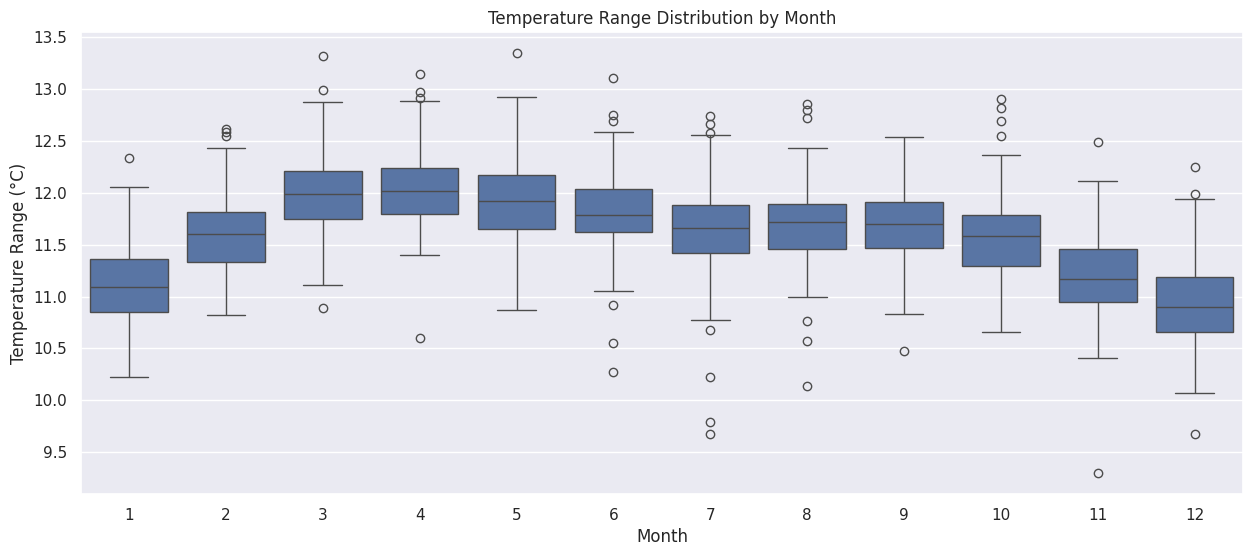

In [12]:
df['temp_range'] = df['LandMaxTemperature'] - df['LandMinTemperature']

# Create box plot for temperature ranges by month
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='month', y='temp_range')
plt.title('Temperature Range Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature Range (°C)')
plt.show()

#### **Key Observations**  
1. **Temperature Range Variation**  
   - Each box represents the **interquartile range (IQR)** (25th to 75th percentile) of temperature range (°C) for each month.  
   - The **median (central line in each box)** fluctuates slightly across months but remains around **11–12°C**.  
   - The spread (IQR) is relatively **consistent throughout the year**, suggesting stable temperature variations across months.  

2. **Outliers**  
   - Several **outliers** are visible, especially in months like **February, March, April, and October**, indicating occasional extreme variations in temperature range.  
   - The presence of lower outliers in **July, August, and December** suggests some instances of unusually low temperature ranges during these months.  

3. **Seasonal Patterns**  
   - **Higher median temperature ranges are observed from March to May**, possibly indicating the transition to warmer months.  
   - **Lower median temperature ranges in December and January** suggest more stable, colder temperature conditions.  

#### **Conclusion**  
- The temperature range is relatively stable throughout the year, with **minor fluctuations and occasional outliers**.  
- Understanding these variations can be useful for **climate trend analysis, energy consumption forecasting, and agricultural planning**.
---

# Correlation Analysis
### In this section, we analyze correlations between numerical temperature-related variables.
### A heatmap is generated to show the strength and direction of relationships between different temperature metrics.


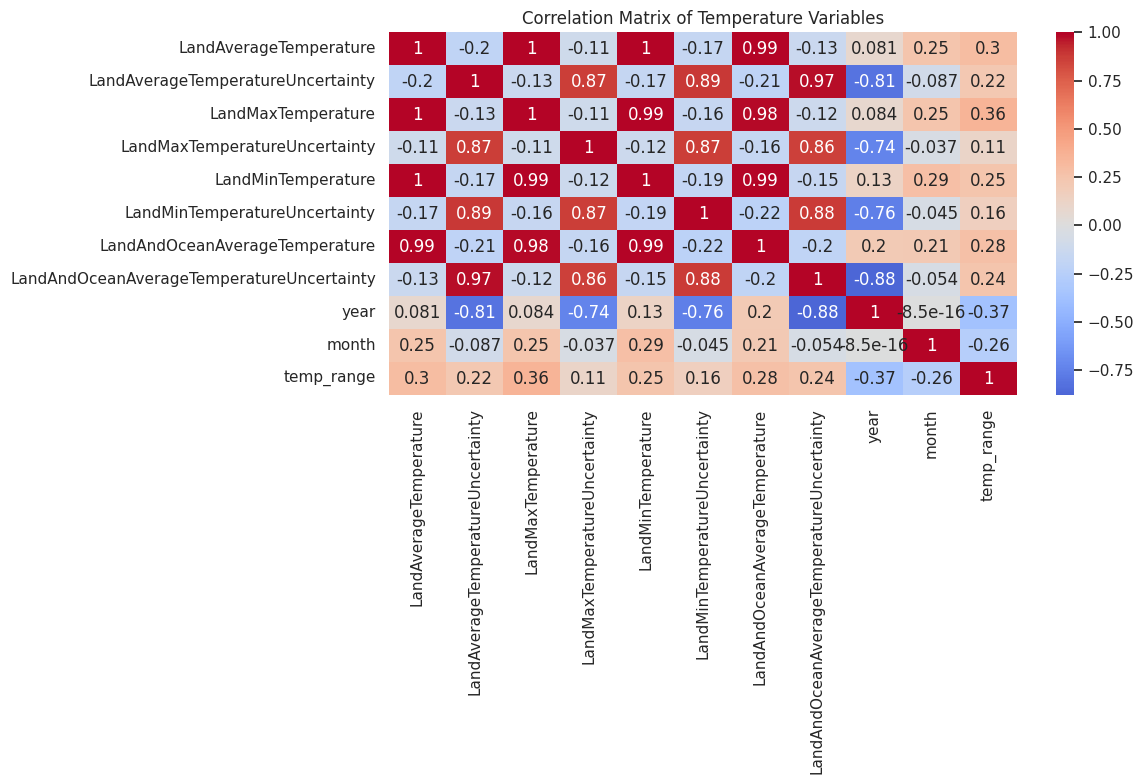

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Temperature Variables')
plt.tight_layout()
plt.show()

### 📌 Inferences

- **Strong Positive Correlations:**
  - `LandAverageTemperature` and `LandAndOceanAverageTemperature` (~0.99) indicate a high similarity in trends between land temperatures and combined land-ocean temperatures.
  - `LandMinTemperature` and `LandMaxTemperature` (~0.99) suggest that regions with higher max temperatures also tend to have higher min temperatures.

- **Negative Correlations:**
  - `year` and `LandAverageTemperatureUncertainty` (-0.81) suggest that as time progresses, uncertainty in temperature measurements has decreased.
  - `month` and `temp_range` (-0.26) indicate that certain months may exhibit a lower temperature variation compared to others.

- **Uncertainty Trends:**
  - Uncertainty values are strongly correlated with their respective temperature values (e.g., `LandAverageTemperatureUncertainty` vs. `LandAverageTemperature` at -0.2).
  - `LandAndOceanAverageTemperatureUncertainty` has a high correlation (~0.97) with `LandAverageTemperatureUncertainty`, indicating a similar level of measurement confidence.

- **Impact of Time:**
  - `year` has a slight positive correlation with temperature (0.081), reinforcing the idea of a long-term warming trend.

📌 **Overall Insight:** The correlation matrix reveals a strong internal consistency between different temperature variables while also showcasing decreasing uncertainty in measurements over time.

---

# Uncertainty Analysis
### Here, we examine the uncertainty associated with temperature measurements.
### We analyze the relationship between uncertainty and average temperature and also observe how uncertainty changes over time.


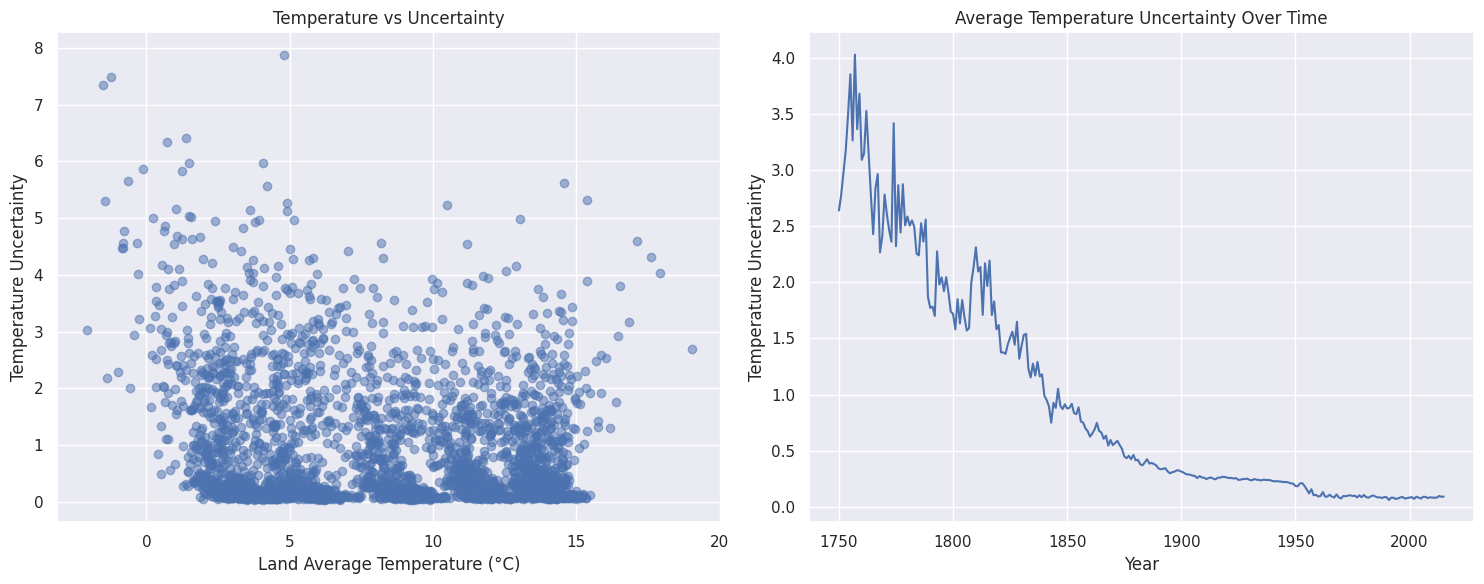

In [14]:
plt.figure(figsize=(15, 6))

# Plot uncertainty vs temperature
plt.subplot(121)
plt.scatter(df['LandAverageTemperature'], 
            df['LandAverageTemperatureUncertainty'],
            alpha=0.5)
plt.title('Temperature vs Uncertainty')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Temperature Uncertainty')

# Plot uncertainty over time
plt.subplot(122)
yearly_uncertainty = df.groupby('year')['LandAverageTemperatureUncertainty'].mean()
yearly_uncertainty.plot(kind='line')
plt.title('Average Temperature Uncertainty Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Uncertainty')
plt.tight_layout()
plt.show()

# Summary Statistics by Decade
### We aggregate temperature statistics by decade to observe long-term trends.
### This includes calculating mean, standard deviation, min, and max temperatures for each decade.
### Additionally, we use a box plot to show the temperature distribution over different decades.



Temperature Statistics by Decade:
            mean       std    min     max
decade                                   
1750    8.149852  5.092547 -1.503  17.910
1760    7.981625  4.798939 -2.080  19.021
1770    8.400108  4.513541 -0.806  16.521
1780    8.141392  4.851923 -1.431  16.468
1790    8.336867  4.357719  0.348  14.951
1800    8.298142  4.543828  0.208  15.774
1810    7.251067  4.468951 -1.385  15.018
1820    8.182233  4.272577  0.595  14.830
1830    7.737700  4.332356 -0.557  14.942
1840    7.978100  4.362818  0.510  14.923
1850    8.064883  4.366360  0.749  14.692
1860    8.104767  4.421002  0.404  14.602
1870    8.276967  4.424341  1.447  14.742
1880    8.046775  4.357313  0.824  14.242
1890    8.150417  4.390101  0.500  14.318
1900    8.257475  4.301761  1.395  14.339
1910    8.280850  4.289835  1.660  14.443
1920    8.492667  4.205575  2.054  14.436
1930    8.641675  4.223703  2.169  14.629
1940    8.725417  4.200933  2.335  14.694
1950    8.620833  4.207763  2.008  14.549

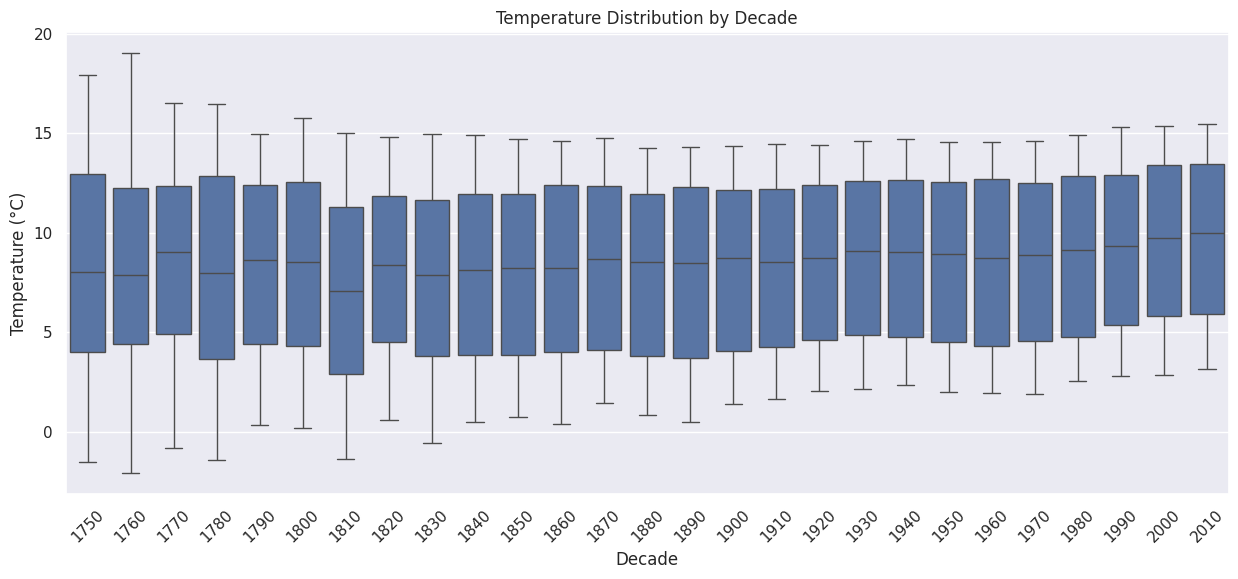

In [15]:
df['decade'] = (df['year'] // 10) * 10
decade_stats = df.groupby('decade')['LandAverageTemperature'].agg(['mean', 'std', 'min', 'max'])
print("\nTemperature Statistics by Decade:")
print(decade_stats)

# Create a more advanced visualization for decade analysis
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='decade', y='LandAverageTemperature')
plt.title('Temperature Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Key Findings Summary
### In this final section, we summarize key observations from our analysis.
### This includes temperature trends, seasonal variations, missing data insights, temperature ranges, and uncertainty trends.


In [16]:
print("\nKey Findings from the Analysis:")
print("1. Temperature Trend:", 
        f"Average increase of {z[0]:.4f}°C per year")
print("2. Seasonal Patterns:", 
        f"Highest average temperature in month {monthly_avg.idxmax()}")
print("3. Data Quality:", 
        f"Maximum missing data percentage: {missing_percentages.max():.2f}%")
print("4. Temperature Range:", 
        f"Average range: {df['temp_range'].mean():.2f}°C")
print("5. Uncertainty Trends:", 
        "Uncertainty levels have shown variation over time")


Key Findings from the Analysis:
1. Temperature Trend: Average increase of 0.0047°C per year
2. Seasonal Patterns: Highest average temperature in month 7
3. Data Quality: Maximum missing data percentage: 37.59%
4. Temperature Range: Average range: 11.61°C
5. Uncertainty Trends: Uncertainty levels have shown variation over time
